In [2]:
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

# sys.path.append(r"C:\Users\Mike\OneDrive\Project\sdtools")
# sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages')


%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [165]:
cs["8a"] = Load.case_1D(rf"C:\Users\mikek\OneDrive\Project\collab\tech\cases\step1d\sta8a-6d_mass_x1.25")

c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


In [163]:
db = CaseDB()

toload = {
    "base0" : "sta10a-bestshot",
    "base1" : "sta10b-ar1pc",
    "base2" : "sta10c-ar2pc",
    "base4" : "sta10d-ar4pc",
    "vis0" : "sta11a-ion_viscosity",
    "vis1" : "sta11b-ar1pc",
    "vis2" : "sta11c-ar2pc",
    "vis4" : "sta11d-ar4pc",
}

cs = dict()   # casestore

for name in toload:
    print(f"Loading {toload[name]}")
    cs[name] = Load.case_1D(rf"C:\Users\mikek\OneDrive\Project\collab\tech\cases\step1d\{toload[name]}")


Loading sta10a-bestshot


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta10b-ar1pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta10c-ar2pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta10d-ar4pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta11a-ion_viscosity


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta11b-ar1pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta11c-ar2pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading sta11d-ar4pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


In [18]:
write_file(cs, "a2.pkl")

a2.pkl written


In [2]:
cs = read_file("a2.pkl")

a2.pkl loaded


In [3]:
%matplotlib widget

In [4]:
caselabels = {

    "base0" : "0% Argon",
    "base1" : "1% Argon",
    "base2" : "2% Argon",
    "base4" : "4% Argon",
    "vis0" : "0% Argon, ion_viscosity",
    "vis1" : "0% Argon, ion_viscosity",
    "vis2" : "0% Argon, ion_viscosity",
    "vis4" : "0% Argon, ion_viscosity",
}

In [194]:
cs["vis0"].ds.isel(t=-1).isel(pos=slice(1,-1))["Ne"].isel(pos=0).values

array(6.46429855e+19)

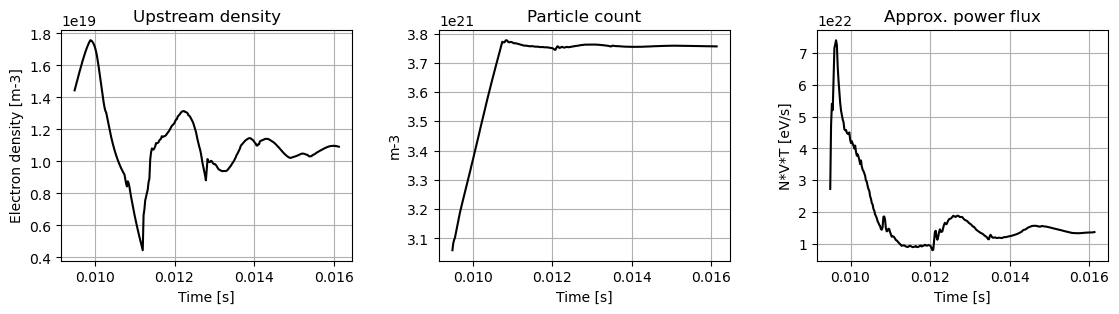

In [54]:

ds = cs["8a"].ds.isel(pos=slice(2,-1), t = slice(2,None))

particle_count = ((ds["Ne"] + ds["Nd"])*ds["dv"]).sum("pos")
nu = ds["Ne"].isel(pos=0)

fig, axes = plt.subplots(1,3, figsize=(4.5*3, 3))
fig.subplots_adjust(wspace=0.3)
nu.plot(ax = axes[0], c = "k")
# (particle_count/particle_count.isel(t=0)).plot(ax = axes[1], c = "k")
particle_count.plot(ax = axes[1], c = "k")
pflux = (ds["Vd+"] * ds["Nd+"] * ds["Td+"]).isel(pos=-1).plot(ax = axes[2], c = "k")

# pflux.plot(ax=axes[2])

axes[0].set_title("Upstream density")
# axes[1].set_title("Fractional particle count")
axes[1].set_title("Particle count")
axes[2].set_title("Approx. power flux")
axes[2].set_ylabel("N*V*T [eV/s]")
axes[1].set_ylabel("m-3")
# axes[2].set_yscale("log")

for ax in axes:
    ax.grid()


KeyError: '8a'

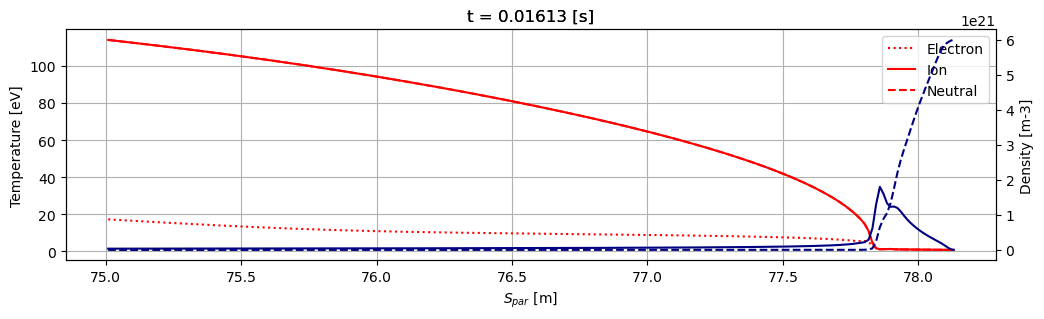

In [52]:
casename = "8a"
ds = cs[casename].ds.isel(pos=slice(1,-1), t = -1)
ds = ds.sel(pos=slice(75,None))

fig, ax = plt.subplots(dpi = 100, figsize = (12,3))
ds["Te"].plot(ax = ax, c = "r", ls = ":", label = "Electron")
ds["Td+"].plot(ax = ax, c = "r", ls = "-", label = "Ion")
ds["Td+"].plot(ax = ax, c = "r", ls = "--", label = "Neutral")

ax2 = ax.twinx()
ds["Ne"].plot(ax = ax2, c = "navy", ls = "-")
ds["Nd"].plot(ax = ax2, c = "navy", ls = "--")

# ax.set_xscale("log")
ax.set_xlabel("$S_{par}$ [m]")
ax.set_ylabel("Temperature [eV]")
ax2.set_ylabel("Density [m-3]")
ax.grid()
ax.legend()
ax.set_title(caselabels[casename])
ax2.set_title("")


In [79]:
ds.data_vars

Data variables:
    Bxy                 (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Dd_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed+_iz              (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed+_rec             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Edd+_cx             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd+_iz              (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd+_rec             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fdd+_cx             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    G1                  (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    G2                  (pos) float64 dask.array<chunksize=(29,), meta=

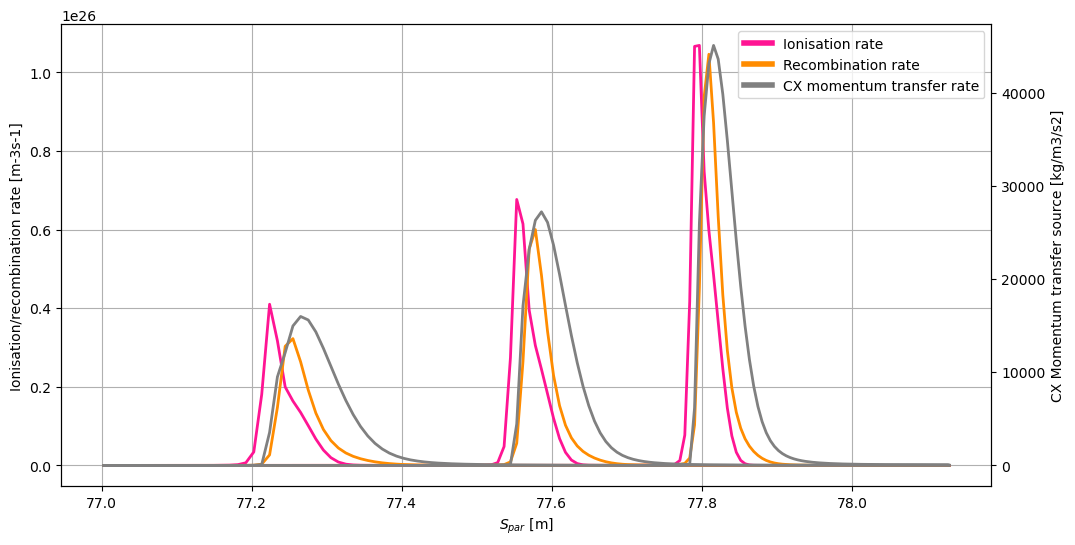

In [74]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(dpi = 100, figsize = (12,6))
ax.grid()
ax2 = ax.twinx()
ms = 0
lw = 2

for name in ["base1", "base2", "base4"]:

    ds = cs[name].ds.isel(t=-1, pos = slice(2,-2))
    ds = ds.sel(pos=slice(77, None))
    pos = ds["pos"]

    # ax.plot(pos, ds["Rar"])
    ax.plot(pos, ds["Sd+_iz"], marker = "o", ms = ms, lw = lw, c = "deeppink")
    ax.plot(pos, abs(ds["Sd+_rec"]), marker = "o", ms = ms, lw = lw, c = "darkorange")
    ax2.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = ms, lw = lw, c = "grey")
    
ax.set_xlabel("$S_{par}$ [m]")
ax.set_ylabel("Ionisation/recombination rate [m-3s-1]")
ax2.set_ylabel("CX Momentum transfer source [kg/m3/s2]")

custom_lines = [Line2D([0], [0], color="deeppink", lw=4, label = "Ionisation rate"),
                Line2D([0], [0], color="darkorange", lw=4, label = "Recombination rate"),
                Line2D([0], [0], color="grey", lw=4, label = "CX momentum transfer rate")]

ax.legend(custom_lines, ["Ionisation rate", "Recombination rate", "CX momentum transfer rate"])
# ax.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = 3)

In [88]:
ds.data_vars

Data variables:
    Bxy                 (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Dd_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed+_iz              (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed+_rec             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Edd+_cx             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd+_iz              (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd+_rec             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fdd+_cx             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    G1                  (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    G2                  (pos) float64 dask.array<chunksize=(29,), meta=

## Particle transfer rates

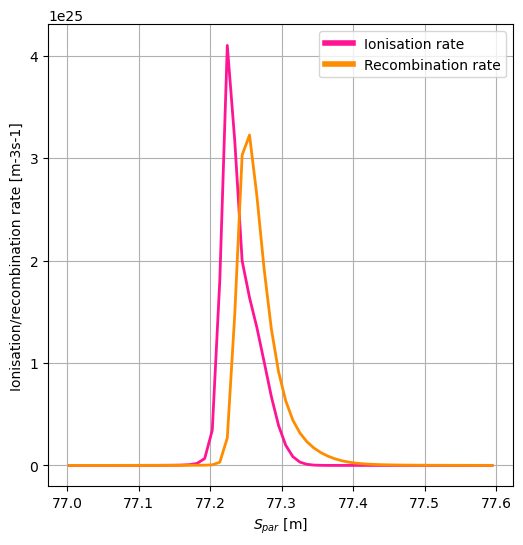

In [92]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(dpi = 100, figsize = (6,6))
ax.grid()
# ax2 = ax.twinx()
ms = 0
lw = 2

for name in ["base4"]:

    ds = cs[name].ds.isel(t=-1, pos = slice(2,-2))
    ds = ds.sel(pos=slice(77, 77.6))
    pos = ds["pos"]

    # ax.plot(pos, ds["Rar"])
    ax.plot(pos, ds["Sd+_iz"], marker = "o", ms = ms, lw = lw, c = "deeppink")
    ax.plot(pos, abs(ds["Sd+_rec"]), marker = "o", ms = ms, lw = lw, c = "darkorange")
    # ax2.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = ms, lw = lw, c = "grey")
    
ax.set_xlabel("$S_{par}$ [m]")
ax.set_ylabel("Ionisation/recombination rate [m-3s-1]")
ax2.set_ylabel("CX Momentum transfer source [kg/m3/s2]")

custom_lines = [Line2D([0], [0], color="deeppink", lw=4, label = "Ionisation rate"),
                Line2D([0], [0], color="darkorange", lw=4, label = "Recombination rate"),
                # Line2D([0], [0], color="grey", lw=4, label = "CX momentum transfer rate")
                ]

ax.legend(custom_lines, ["Ionisation rate", "Recombination rate", "CX momentum transfer rate"])
# ax.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = 3)

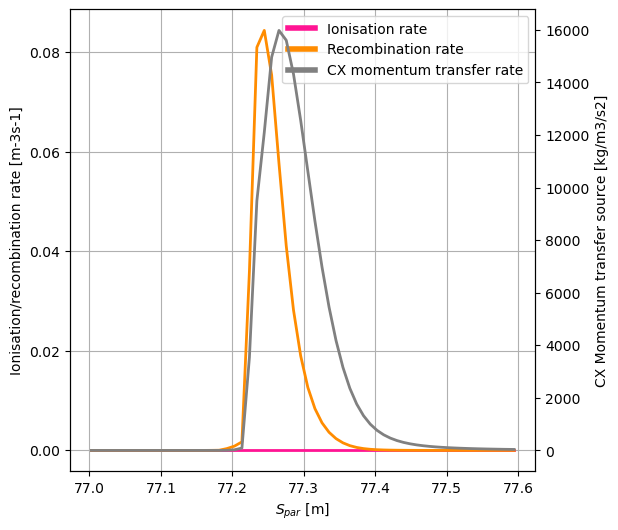

In [90]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(dpi = 100, figsize = (6,6))
ax.grid()
ax2 = ax.twinx()
ms = 0
lw = 2

for name in ["base4"]:

    ds = cs[name].ds.isel(t=-1, pos = slice(2,-2))
    ds = ds.sel(pos=slice(77, 77.6))
    pos = ds["pos"]

    # ax.plot(pos, ds["Rar"])
    ax.plot(pos, ds["Fd+_iz"], marker = "o", ms = ms, lw = lw, c = "deeppink")
    ax.plot(pos, abs(ds["Fd+_rec"]), marker = "o", ms = ms, lw = lw, c = "darkorange")
    ax2.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = ms, lw = lw, c = "grey")
    
ax.set_xlabel("$S_{par}$ [m]")
ax.set_ylabel("Ionisation/recombination rate [m-3s-1]")
ax2.set_ylabel("CX Momentum transfer source [kg/m3/s2]")

custom_lines = [Line2D([0], [0], color="deeppink", lw=4, label = "Ionisation rate"),
                Line2D([0], [0], color="darkorange", lw=4, label = "Recombination rate"),
                Line2D([0], [0], color="grey", lw=4, label = "CX momentum transfer rate")]

ax.legend(custom_lines, ["Ionisation rate", "Recombination momentum transfer", "CX momentum transfer"])
# ax.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = 3)

In [115]:
%matplotlib inline

In [144]:
ds.data_vars

Data variables:
    Bxy                 (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Dd_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed+_iz              (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed+_rec             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Ed_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Edd+_cx             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd+_iz              (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd+_rec             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fd_Dpar             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    Fdd+_cx             (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    G1                  (pos) float64 dask.array<chunksize=(29,), meta=np.ndarray>
    G2                  (pos) float64 dask.array<chunksize=(29,), meta=

Text(0.5, 29.71666626930236, '$S_{par}$ [m]')

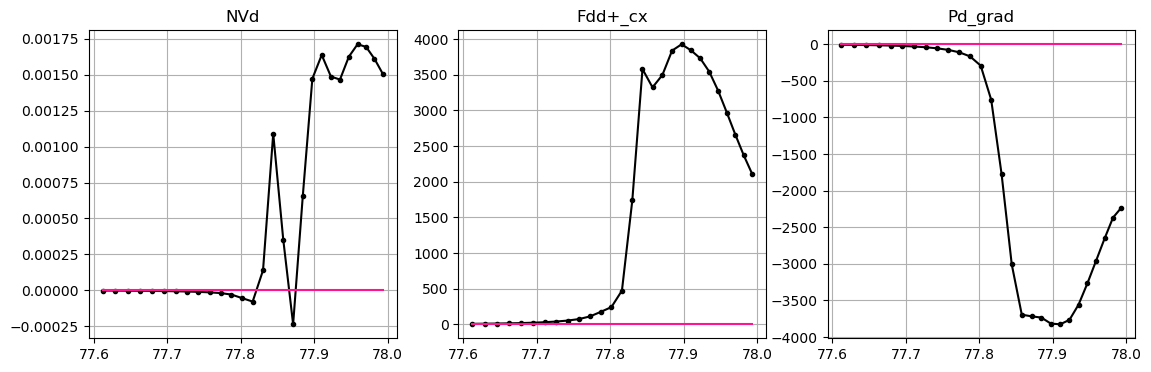

In [192]:
from matplotlib.lines import Line2D

ms = 0
lw = 2

# ds = cs["base4"].ds.isel(t=-1, pos = slice(2,-2)); ds = ds.sel(pos=slice(77, 77.5))
ds = cs["8a"].ds.isel(t=-1, pos = slice(2,-2)); ds = ds.sel(pos=slice(77.6, 78))

ds["Sd+"] = ds["Sd+_iz"] + ds["Sd+_rec"]
ds["Fd+"] = ds["Fd+_iz"] + ds["Fd+_rec"] + ds["Fdd+_cx"]
ds["R"] = ds["Rd+_ex"] + ds["Rd+_rec"] + ds["Rar"]
ds["Pd+_grad"] = ds["Pd+"].differentiate("pos") *-1
ds["Pd_grad"] = ds["Pd"].differentiate("pos") *-1
# ds["Fdd+_cx"] *= -1


pos = ds["pos"]

# params = ["Sd+", "Fd+_iz", "" "NVd+", "Vd+", "Pd+"]
# params = ["Fd+", "Fd+_iz", "Fd+_rec", "Fdd+_cx"]
# params = ["NVd+", "Fd+",  "Fd+_iz", "Fd+_rec", "Fdd+_cx"]
# params = ["NVd+", "Sd+", "Sd+_iz", "Sd+_rec"]
# params = ["NVd+", "Fd+", "Pd+_grad", "R"]
# params = ["Sd_src", "Sd+_src"]

# params = ["NVd+", "Fdd+_cx", "Pd+_grad"]
params = ["NVd", "Fdd+_cx", "Pd_grad"]
# params = ["NVd+", "NVd", "Fdd+_cx", "Pd+_grad", "Pd_grad"]

num_plots = len(params)
fig, axes = plt.subplots(1, num_plots, dpi = 100, figsize = (4.5*num_plots,4))

colors = ["teal", "darkorange"]
labels = ["Neutrals", "Ions"]

for i, param in enumerate(params):
    axes[i].plot(pos, ds[param], c="k", marker = "o", ms = 3, label = labels[j])        
    axes[i].plot(pos, np.zeros_like(ds[param]), c = "deeppink")
    axes[i].set_title(param)
    axes[i].grid()
    # axes[i].legend()
ax.set_xlabel("$S_{par}$ [m]")
# ax.set_ylabel("Ion source")

# ax.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = 3)

## Ions + neutrals on same plot

Text(0.5, 29.71666626930236, '$S_{par}$ [m]')

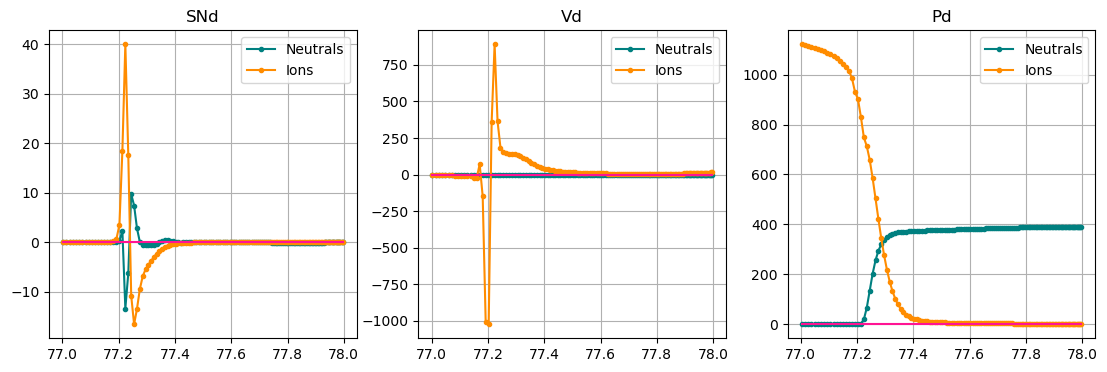

In [134]:
from matplotlib.lines import Line2D

ms = 0
lw = 2

ds = cs["base4"].ds.isel(t=-1, pos = slice(2,-2))
# ds = ds.sel(pos=slice(77.6, 78))
ds = ds.sel(pos=slice(77, 78))
pos = ds["pos"]

# params = ["SNd+", "NVd+", "Vd+", "Pd+"]
params = ["SNd", "Vd", "Pd"]
num_plots = len(params)
fig, axes = plt.subplots(1, num_plots, dpi = 100, figsize = (4.5*num_plots,4))

colors = ["teal", "darkorange"]
labels = ["Neutrals", "Ions"]

for i, param in enumerate(params):
    for j, char in enumerate(["", "+"]):
        axes[i].plot(pos, ds[f"{param}{char}"], c=colors[j], marker = "o", ms = 3, label = labels[j])
        
    axes[i].plot(pos, np.zeros_like(ds[param]), c = "deeppink")
    axes[i].set_title(param)
    axes[i].grid()
    axes[i].legend()
ax.set_xlabel("$S_{par}$ [m]")
# ax.set_ylabel("Ion source")

# ax.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = 3)

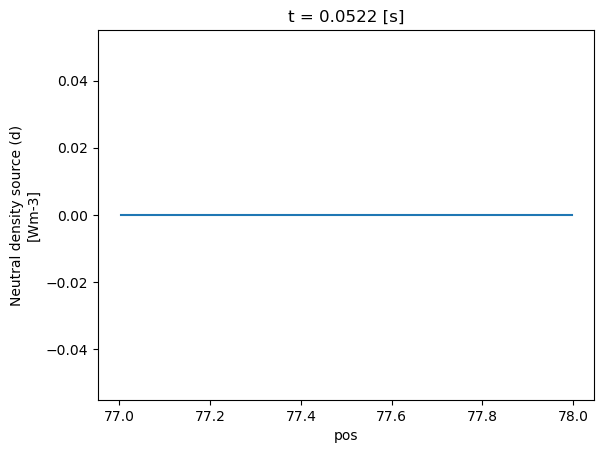

In [135]:
ds["Sd_src"].plot()

Text(0, 0.5, 'Rate [m-3s-1]')

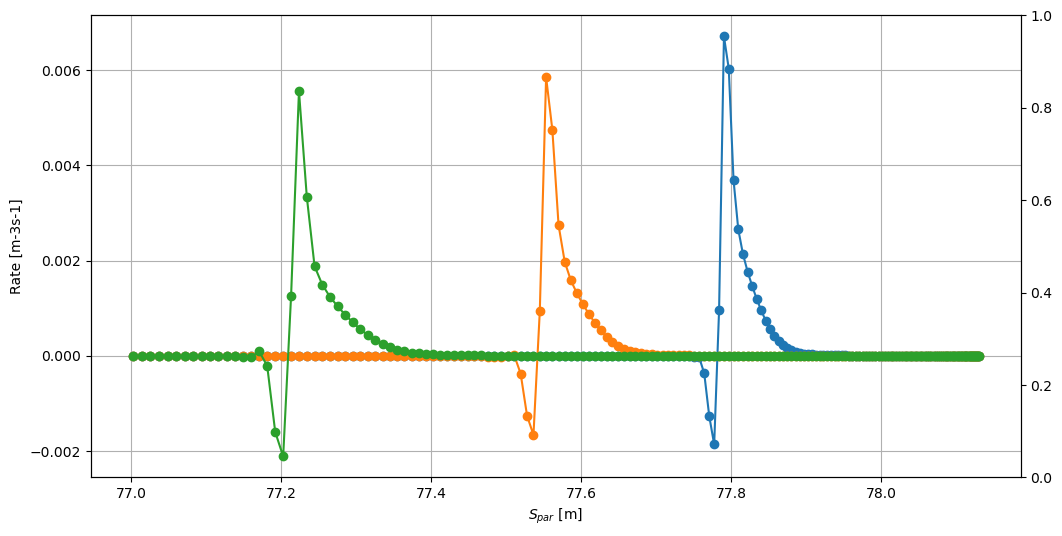

In [95]:
fig, ax = plt.subplots(dpi = 100, figsize = (12,6))
ax.grid()
ax2 = ax.twinx()
ms = 3
lw = 2

for name in ["base1", "base2", "base4"]:

    ds = cs[name].ds.isel(t=-1, pos = slice(2,-2))
    ds = ds.sel(pos=slice(77, None))
    pos = ds["pos"]

    ax.plot(pos, ds["NVd+"], marker = "o")
    # ax.plot(pos, ds["Sd+_iz"], marker = "o", ms = ms, lw = lw, c = "deeppink")
    # ax.plot(pos, abs(ds["Sd+_rec"]), marker = "o", ms = ms, lw = lw, c = "darkorange")
    # ax2.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = ms, lw = lw, c = "grey")
ax.set_xlabel("$S_{par}$ [m]")
ax.set_ylabel("Rate [m-3s-1]")
# ax.plot(pos, abs(ds["Fdd+_cx"]), marker = "o", ms = 3)

In [52]:
# fig, ax = plt.subplots(dpi = 100, figsize = (8,6))

df = pd.DataFrame()
for i in [0,1,2,4]:
    ds = cs[f"base{i}"].ds
    df.loc[i, "nu"] = ds["Ne"].isel(pos=1, t = -1).values
    df.loc[i, "avg_ncalls"] = np.mean(ds["ncalls"].values)
    df.loc[i, "max_ncalls"] = np.max(ds["ncalls"].values)
    
df

,nu,avg_ncalls,max_ncalls
0,6.464513e+19,29832.043189,1234068.0
1,3.771914e+19,13838.126246,637671.0
2,2.898461e+19,42099.577114,1634371.0
4,2.185204e+19,125065.855721,1481567.0


In [62]:
ds = cs["base0"].ds

ds2 = ds.isel(pos=slice(2,-2), t=-1)
idxmax = ds2["Rar"].argmax(dim="pos").values
dist = max(ds2["pos"]) - ds2["pos"][idxmax]

In [5]:
%matplotlib widget

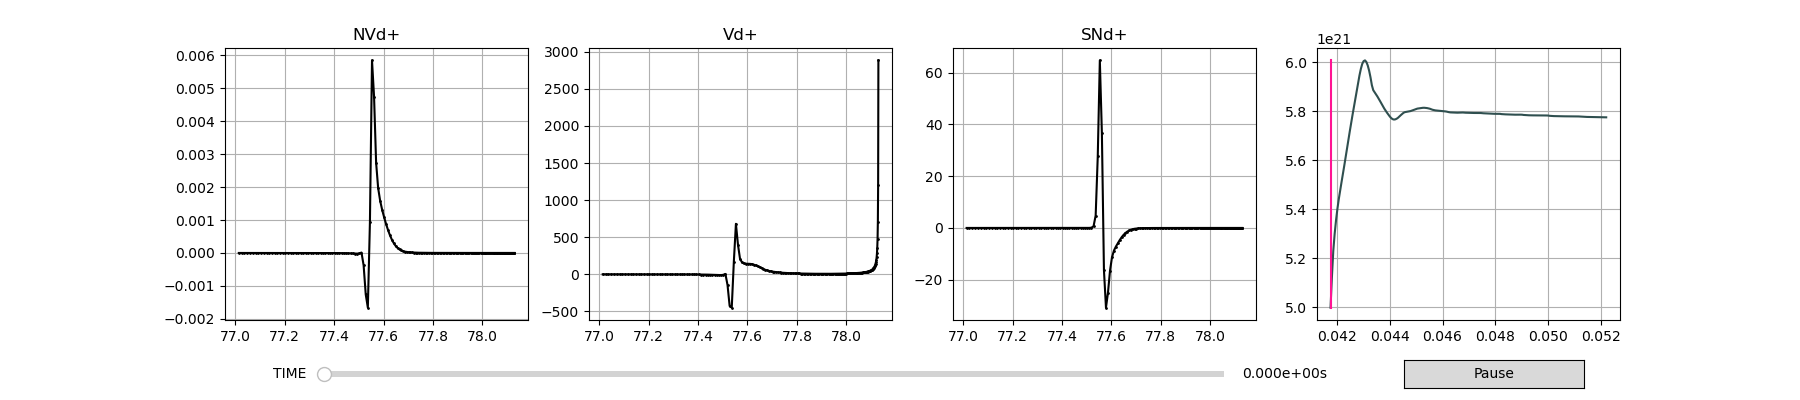

In [104]:
from hermes3.plot1d import *

animate_with_reference(cs["base4"].ds.isel(pos=slice(1,-1)).sel(pos=slice(77,None)), params = ["NVd+", "Vd+", "SNd+"], auxparam = ds["ncalls"])

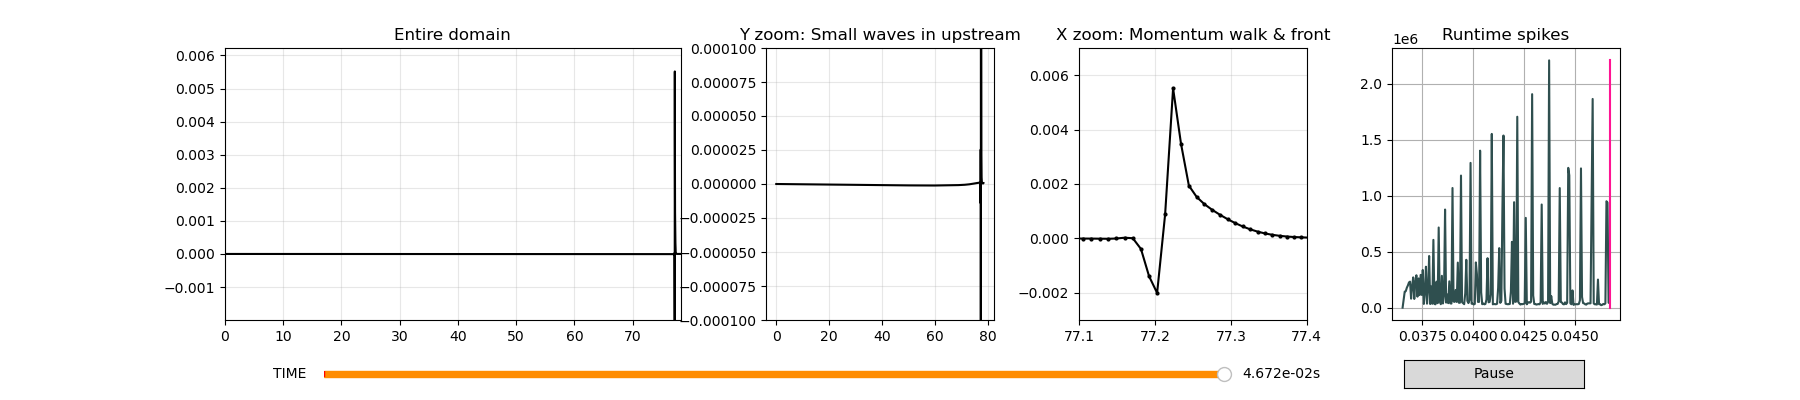

In [99]:
from matplotlib.widgets import RangeSlider, TextBox, Slider
import animatplot as amp

plt.close("all")

dpi = 100

wspace = 0.3
ds = cs["vis4"].ds.isel(pos=slice(1,-1))
# params = ["NVd+", "Sd+_iz", "Sd+_rec"]
params = ["NVd+", "NVd+", "NVd+"]
# params = ["Sd+_"]
auxparam = ds["ncalls"]
# auxparam = ((ds["Nd+"]+ds["Nd"]) * ds["dv"]).sum("pos")
t = ds.coords["t"].values
num_plots = len(params)

fig = plt.figure(dpi=dpi)
fig.set_figheight(4)
fig.set_figwidth(num_plots*6)
fig.subplots_adjust(bottom = 0.2)

# Plot grid
gs0a = mpl.gridspec.GridSpec(
                                ncols=num_plots+1, nrows=1,
                                wspace = wspace,
                                width_ratios = [0.4, 0.2, 0.2, 0.2]
                                )

axes = [None] * num_plots
data = [None] * num_plots
blocks = [None] * num_plots

timeline = amp.Timeline(t, units = "s", fps = 10)


pos = ds["pos"].values

for i, param in enumerate(params):
    data[i] = ds[param].values

# Make scanning line
vline = np.repeat(np.array([[min(auxparam.values), max(auxparam.values)]]), len(t), axis = 0)



axes[0] = fig.add_subplot(gs0a[0])
blocks[0] = amp.blocks.Line(ds["pos"], ds[param].values, ax = axes[0], color = "black", marker = "o", markersize = 0)
axes[0].set_xlim(0,78.2)
axes[0].set_title("Entire domain")
# axes[0].set_yscale("symlog")

zoomds = ds.sel(pos=slice(None,None)).copy()
axes[1] = fig.add_subplot(gs0a[1])
blocks[1] = amp.blocks.Line(zoomds["pos"], zoomds[param].values, ax = axes[1], color = "black", marker = "o", markersize = 0)
axes[1].set_ylim(-0.0001, 0.0001)
axes[1].set_title("Y zoom: Small waves in upstream")
# axes[1].set_yscale("symlog")


zoomds = ds.sel(pos=slice(76,None)).copy()
axes[2] = fig.add_subplot(gs0a[2])
blocks[2] = amp.blocks.Line(zoomds["pos"], zoomds[param].values, ax = axes[2], color = "black", marker = "o", markersize = 2)
axes[2].set_xlim(77.1, 77.4)
axes[2].set_title("X zoom: Momentum walk & front")
axes[2].set_ylim(-0.003, 0.007)

for i in [0,1,2]:
    axes[i].grid(alpha = 0.3)

# Aux plot and vline
axes.append(fig.add_subplot(gs0a[len(params)]))
axes[-1].plot(t, auxparam, c = "darkslategrey")
axes[-1].grid()
axes[-1].set_title("Runtime spikes")

# Line is two points, these are the X coordinates for those two points for all times
x = np.tile(t,  (2,1)).transpose()
blocks.append(amp.blocks.Line(x, vline, ax = axes[-1], t_axis=0, color = "deeppink"))

# blocks[-1] = 
    
anim = amp.Animation(blocks, timeline)
anim.controls({"text":"TIME", "color":"darkorange", "valfmt":"%1.3e"})
aux_plot_idx = num_plots
    
anim.save_gif("vis4walk.gif")




In [96]:
%matplotlib widget

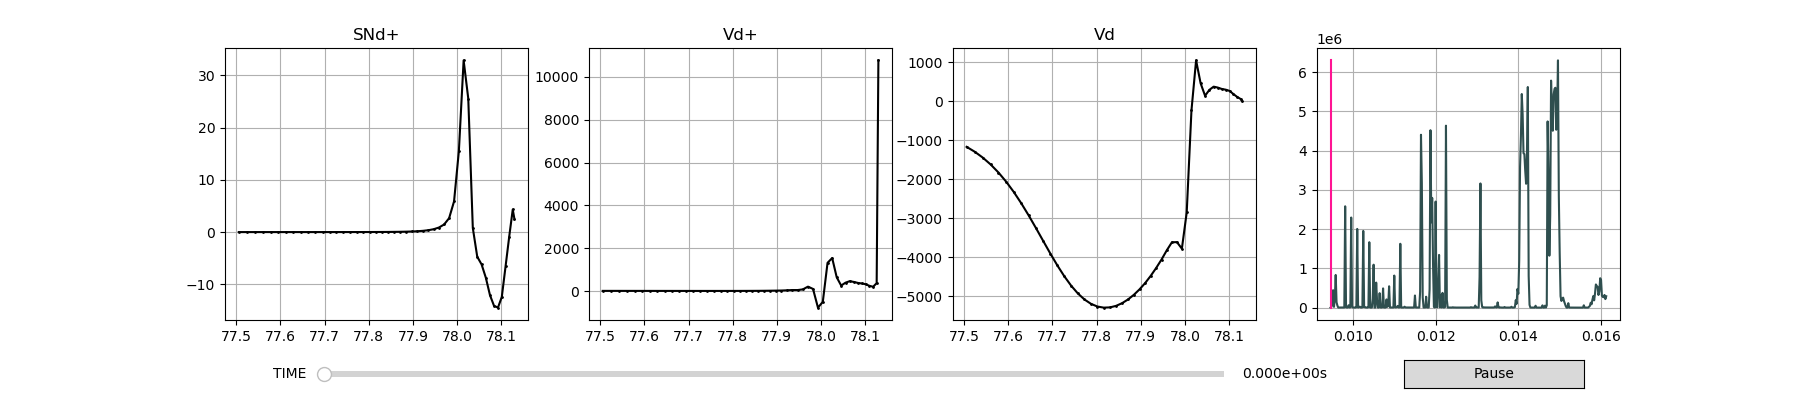

In [24]:
dpi = 100
ds = cs["8a"].ds
wspace = 0.2
params = ["SNd+", "Vd+", "Vd"]
# params = ["NVd+", "Sd+_iz", "Sd+_rec"]
# params = ["Sd+_"]
auxparam = ds["ncalls"]
# auxparam = ((ds["Nd+"]+ds["Nd"]) * ds["dv"]).sum("pos")
t = ds.coords["t"].values
num_plots = len(params)



ds = ds.isel(pos=slice(2,-1))
ds = ds.sel(pos=slice(77.5,None))

fig = plt.figure(dpi=dpi)
fig.set_figheight(4)
fig.set_figwidth(num_plots*6)
fig.subplots_adjust(bottom = 0.2)

# Plot grid
gs0a = mpl.gridspec.GridSpec(
                                ncols=num_plots+1, nrows=1,
                                wspace = wspace
                                )

axes = [None] * num_plots
data = [None] * num_plots
blocks = [None] * num_plots

timeline = amp.Timeline(t, units = "s", fps = 10)


pos = ds["pos"].values

for i, param in enumerate(params):
    data[i] = ds[param].values

# Make scanning line
vline = np.repeat(np.array([[min(auxparam.values), max(auxparam.values)]]), len(t), axis = 0)


for i, param in enumerate(params):
    # All plots after the first one share x and y axes
    if i == 0:
        axes[i] = fig.add_subplot(gs0a[i])
    else:
        axes[i] = fig.add_subplot(gs0a[i], sharex=axes[0])
        
    blocks[i] = amp.blocks.Line(pos, ds[param].values, ax = axes[i], color = "black", marker = "o", markersize = 1)
    # axes[i].set_xlim(77,78.2)
    axes[i].set_title(param)
    axes[i].grid()
    

# Aux plot and vline
axes.append(fig.add_subplot(gs0a[len(params)]))
axes[-1].plot(t, auxparam, c = "darkslategrey")
axes[-1].grid()

# Line is two points, these are the X coordinates for those two points for all times
x = np.tile(t,  (2,1)).transpose()
blocks.append(amp.blocks.Line(x, vline, ax = axes[-1], t_axis=0, color = "deeppink"))

    
anim = amp.Animation(blocks, timeline)
anim.controls({"text":"TIME", "color":"darkorange", "valfmt":"%1.3e"})
aux_plot_idx = num_plots
    

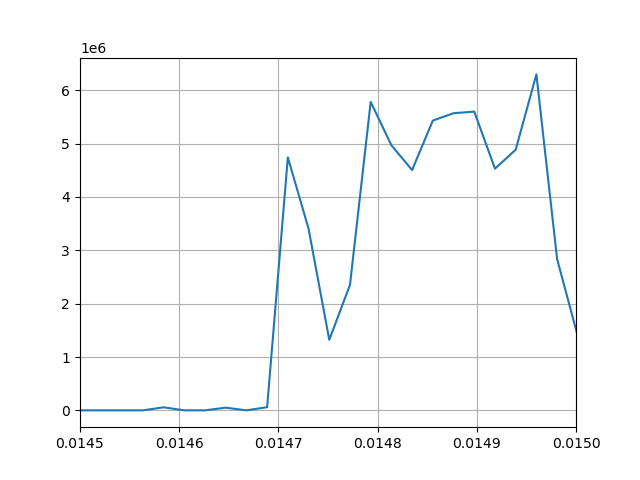

In [25]:
plt.close("all")
fig, ax = plt.subplots()
data = ds["ncalls"].values
tinds = [-15, -12, -10, -8, -6]
ax.plot(t, ds["ncalls"])
ax.vlines([t[x] for x in tinds], min(data), max(data), colors = "red")
ax.set_xlim(0.0145, 0.0150)
ax.grid()


In [276]:
%matplotlib inline

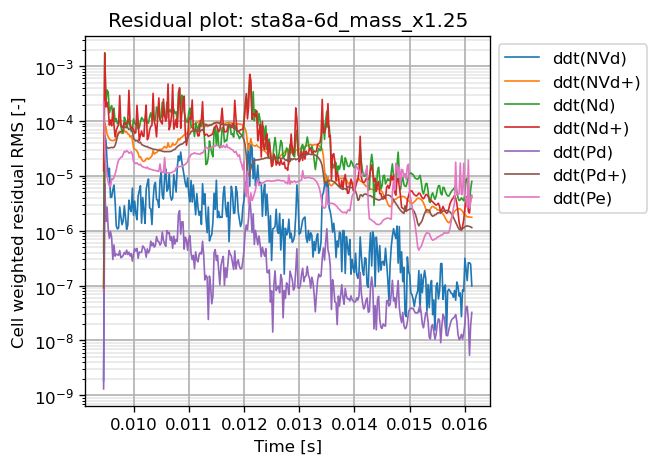

In [55]:
plot_ddt(cs["8a"])

In [280]:
%matplotlib widget

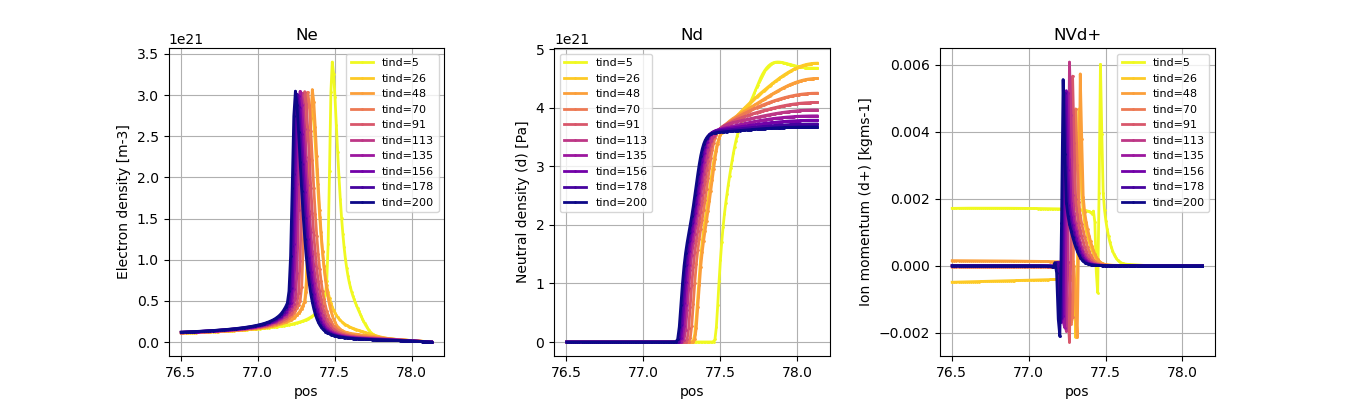

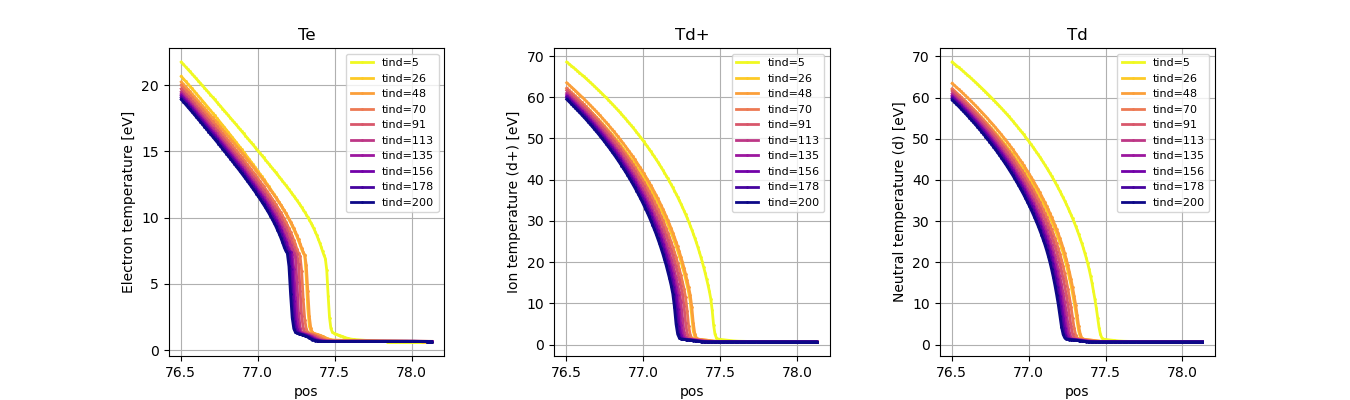

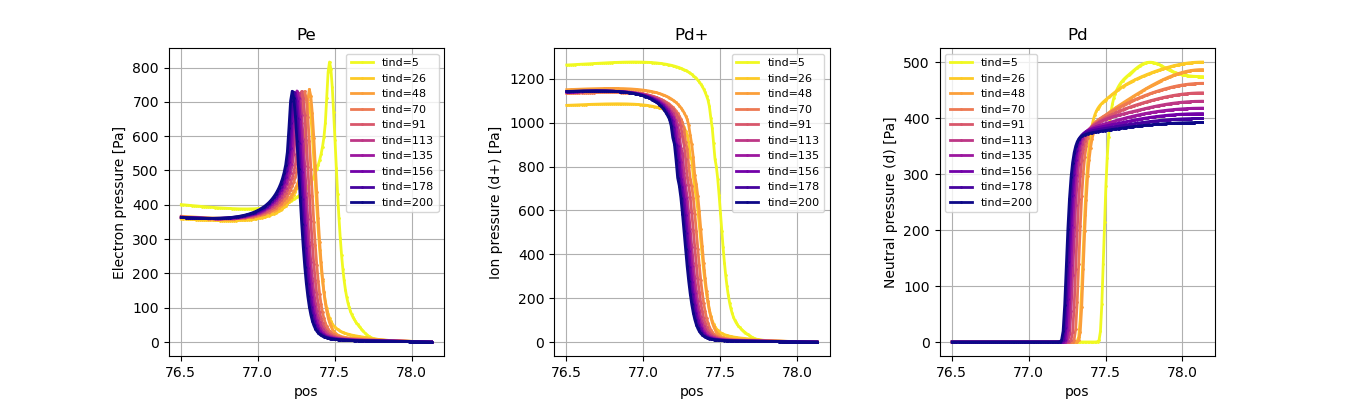

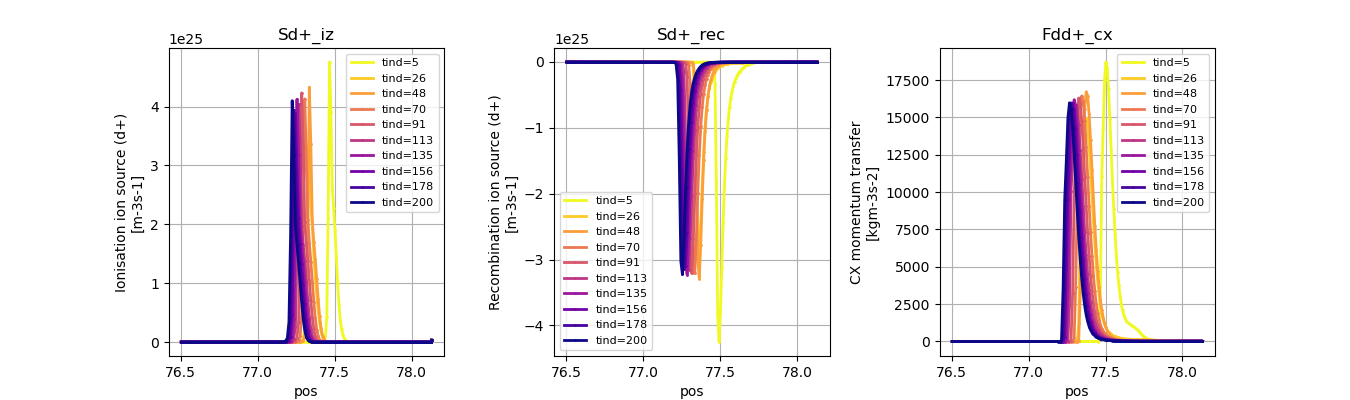

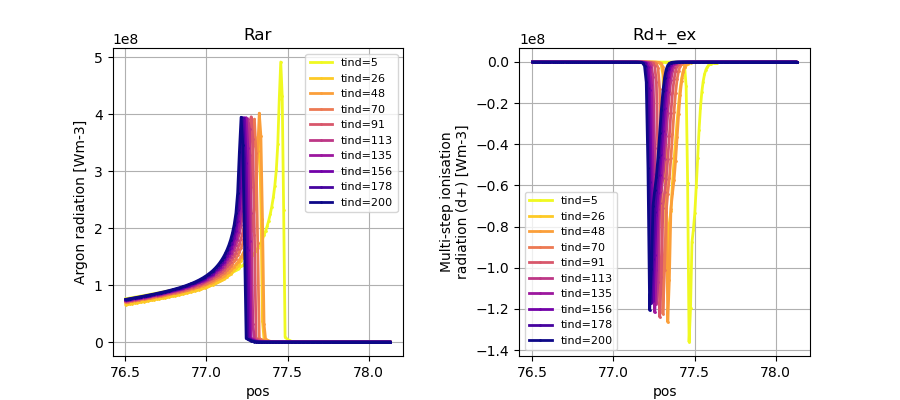

In [101]:
plt.close("all")
case = cs["base4"]
ds = case.ds.isel(pos=slice(2,-1))


def plot(list_params):
    fig, axes = plt.subplots(1, len(list_params), figsize=(len(list_params)*4.5, 4), dpi = 100)
    fig.subplots_adjust(wspace = 0.4)
    
    # times = np.arange(-30,0,2)
    # times = [-6, -5, -4, -3, -2, -1]
    # times = [-15, -12, -10, -8, -6]
    # times = [-1]
    
    times = np.linspace(5, len(ds.coords["t"])-1, 10, dtype=int)
    # alphas = np.linspace(0.1,0.8, len(times))
    alphas = [1] * len(times)
    colors = make_cmap("plasma", len(times))[::-1]
    for j, param in enumerate(list_params):
        for i, tind in enumerate(times):
            data = ds[param].isel(t=tind)
            data = data.sel(pos=slice(76.5,None))
            data.plot(ax = axes[j], x = "pos", marker = "o", label = f"tind={tind}", color = colors[i], ms = 1, lw = 2, alpha = alphas[i])
            
        axes[j].grid()
        axes[j].set_title(param)
        axes[j].legend(fontsize=8)
        # axes[j].set_yscale("symlog")
        
# plot(["Rar", "Sd+_iz", "Ne", "Td+"])
plot(["Ne", "Nd", "NVd+"])
# plot(["NVd+", "NVd"])
# plot(["NVd+", ])
plot(["Te", "Td+", "Td"])
plot(["Pe", "Pd+", "Pd"])
plot(["Sd+_iz", "Sd+_rec", "Fdd+_cx"])
plot(["Rar", "Rd+_ex"])

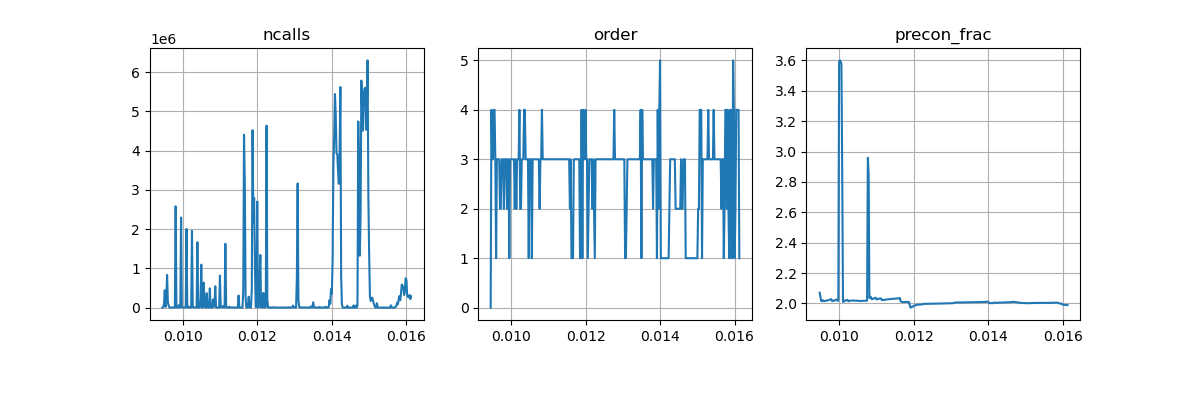

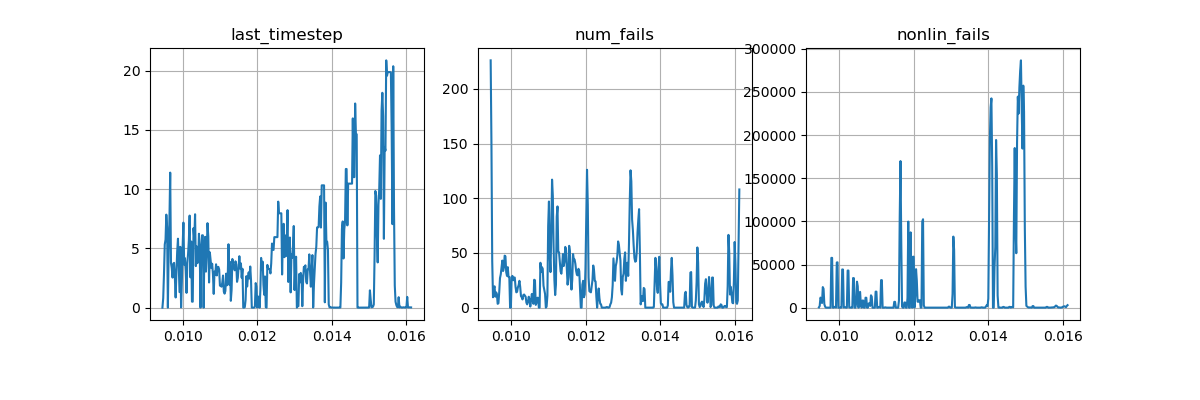

In [26]:






def plot(data):
    num_plots = len(data.keys())

    t = ds.coords["t"]

    fig = plt.figure(dpi=dpi)
    fig.set_figheight(4)
    fig.set_figwidth(num_plots*4)
    fig.subplots_adjust(bottom = 0.2)

    # Plot grid
    gs = mpl.gridspec.GridSpec(
                                    ncols=num_plots, nrows=1,
                                    wspace = wspace
                                    )



    axes = [None] * len(data.keys())


    for i, param in enumerate(data.keys()):
        # All plots after the first one share x and y axes
        if i == 0:
            axes[i] = fig.add_subplot(gs[i])
        else:
            axes[i] = fig.add_subplot(gs[i], sharex=axes[0])
            
        axes[i].plot(t, data[param])
        axes[i].set_title(param)
        axes[i].grid()
        
data = dict()
data["ncalls"] = ds["ncalls"].values
data["order"] = ds["cvode_last_order"].values
data["precon_frac"] = np.divide(ds["cvode_npevals"],(ds["cvode_nfevals"]))
# data["stab_lims"] = ds["cvode_stab_lims"]
plot(data)

data = dict()
data["last_timestep"] = ds["cvode_last_step"]
data["num_fails"] = np.clip(np.gradient(ds["cvode_num_fails"]), 0, None)
data["nonlin_fails"] = np.clip(np.gradient(ds["cvode_nonlin_fails"]), 0, None) #np.gradient(t, ds["cvode_nonlin_fails"])
plot(data)


In [32]:
cs["8a"].ds.coords

Coordinates:
    dx       (pos) float64 dask.array<chunksize=(82,), meta=np.ndarray>
    dy       (pos) float64 dask.array<chunksize=(82,), meta=np.ndarray>
    dz       (pos) float64 dask.array<chunksize=(82,), meta=np.ndarray>
  * t        (t) float64 0.009448 0.009469 0.00949 ... 0.01609 0.01611 0.01613
  * y        (y) float64 0.09392 0.2817 0.4692 0.6565 ... 78.49 78.5 78.51 78.52
  * pos      (pos) float64 -0.2814 0.0 0.09376 0.281 ... 78.12 78.13 78.13 78.14

In [45]:
%matplotlib inline

In [50]:
cs.keys()

dict_keys(['base0', 'base1', 'base2', 'base4', 'vis0', 'vis1', 'vis2', 'vis4', '8a'])

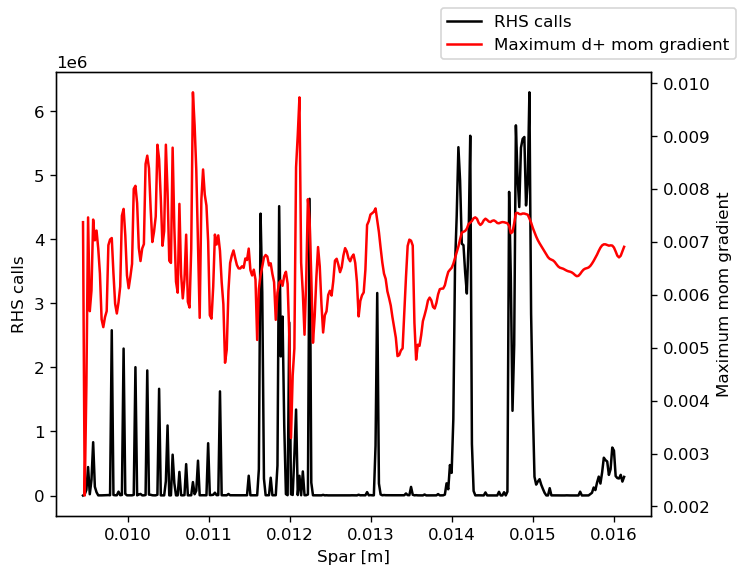

In [51]:
fig, ax = plt.subplots(dpi = 120)

ds = cs["8a"].ds
# ds = ds.isel(pos=slice(2,-1))

# pos = ds["pos"]
momgrad = ds["NVd+"].differentiate("pos")
maxgrad = momgrad.max("pos")
# momgrad = np.gradient(ds["pos"], ds["NVd+"])
# maxgrad = momgrad.max("t")
ax2 = ax.twinx()
ax.plot(ds["t"], ds["ncalls"], c = "k", label = "RHS calls")
# ax2.plot(ds["t"], maxgrad, c = "r", label = "Maximum d+ mom gradient")
ax2.plot(ds["t"], ds["NVd+"].max("pos"), c = "r", label = "Maximum d+ mom gradient")
ax.set_xlabel("Spar [m]")
ax.set_ylabel("RHS calls")
ax2.set_ylabel("Maximum mom gradient")
fig.legend()